#### Nama : Gulfi Oktariani
#### NIM : 09011381823118
#### Ujian Akhir Semester Kecerdasan Buatan

#### Klasifikasi Nilai Ujian Mengunakan K-Nearest Neighbor

K-NN merupakan salah satu algoritma untuk klasifikasi data suatu objek berdasarkan sejumlah K-data training yang memiliki jarak paling dekat dengan objek tersebut. Jauh dekatknya tetangga, biasanya dihitung berdasarkan jarak Euclidean (d) sebagai berikut.
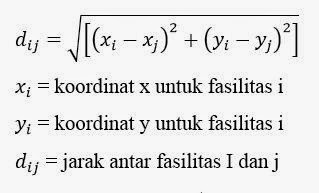

Langkah-Langkah Algoritma K-NN :
1. Menentukan parameter *K*, bilangan bulat positif sebagai nearest neighbors (banyaknya tetangga terdekat).
2. Hitung jarak antara data baru dan semua data yang ada di data training.
3. Menentukan *K* tetangga terdekat berdasarkan jarak minumum.
4. Tetangga yang memiliki frekuensi terbanyak diambil sebagai *nilai prediksi* atau *hasil klasifikasi* dari data baru.

Refrensi data set : https://www.kaggle.com/spscientist/students-performance-in-exams

##### Import Library

In [1]:
# Memanggil pandas untuk manipulasi data
import pandas as pd
# Memanggil matplot untuk grafik
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Memanggi; library sk learn untuk KNN Clasifier 
from sklearn.neighbors import KNeighborsClassifier 
# memanggil numpy untuk mengolah data numerical
import numpy as np 

##### Menampilkan Data

In [2]:
# Memanggil data fruit pada file csv
# Memasukkan ke dalam variabel sp
sp = pd.read_csv('StudentsPerformance.csv')

# melihat 5 baris pertama dari data set
sp.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Menghapus Kolom
sp = sp.drop(['race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
sp.head(5)

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [4]:
# Menampilkan banyak baris dan kolom dari data
sp.shape

(1000, 4)

In [5]:
# Cek Tipe Data
sp.dtypes

gender           object
math score        int64
reading score     int64
writing score     int64
dtype: object

Memiliki 4 data integer dan 1 data object

(array([518.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 482.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

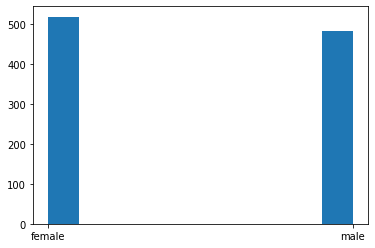

In [6]:
plt.hist(sp['gender'])

#### Split Data Set (training data dan test data)

Pada umumnya explanatory variable di simbolkan dengan huruf  X besar, dan response variable(target value) disimbolkan dengan huruf y kecil. Untuk data set ini kita akan membagi data tersebut menjadi 70% untuk training data data dan 30% untuk test data.
Random state digunakan untuk insiasi pengacakan.

In [7]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Pada kasus ini explanatory variablenya adalah mass, width dan height sedangkan target variablenya adalah fruit_label
X = sp[['math score','reading score','writing score']]
y = sp['gender']


# kita akan mensplit menjadi 70% train data and 30% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

##### Hasil setelah di split

In [8]:
# Chek dimensi array dari massing masing variable
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (700, 3)
X_test =  (300, 3)
y_train =  (700,)
y_test =  (300,)


Dimensi X_train menjadi 700 baris dan 3 kolom, dimensi X_test menjadi 300 baris dan 3 kolom, dimensi y_train menjadi 700 baris dan 1 kolom, dimensi y_train menjadi 300 baris dan 1 kolom. 

In [9]:
X_train.head()

,math score,reading score,writing score
904,67,84,84
132,87,74,70
942,81,66,64
784,91,81,79
681,60,68,60


hasil X_train

In [10]:
y_train.head()

904    female
132      male
942      male
784      male
681      male
Name: gender, dtype: object

hasil y_train

##### Memanggil KNN dan Melakukan Training

Untuk model ini akan menggunakan n_neighbors = 5, jadi kita memprediksi berdasarkan jarak dari 5 titik terdekat. 

In [11]:
# Memanggil KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 7)

# Fitting model dengan training data dan target
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

merupakan hyperparameter yang bisa di tuning atau diubah nantinya

###### Accuracy Score untuk test data

Dalam hal ini kita akan menggunakan test data untuk melihat seberapa besar accuracy score.

In [ ]:
y_prediksi = knn.predict(X_test)
y_prediksi

Hasil dari y_prediksi

In [12]:
y_test

544    female
515    female
193      male
11       male
279      male
        ...  
384    female
477      male
562      male
636    female
510      male
Name: gender, Length: 300, dtype: object

Hasil dari y_test

In [13]:
print(f"Akurasi model K-NN :{knn.score(X_test, y_test)}")

Akurasi model K-NN :0.8866666666666667


#### Confusion Matrix

In [14]:
# Memanggil Classification report dari sklearn 
from sklearn.metrics import classification_report

# Mencetak classification_report dari y_test dan y_prediksi
print (classification_report (y_test, y_prediksi))

              precision    recall  f1-score   support

      female       0.87      0.91      0.89       150
        male       0.91      0.86      0.88       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [15]:
# Memanggil metrics dari sklearn 
from sklearn import metrics
pd.DataFrame(metrics.confusion_matrix(y_test, y_prediksi))

,0,1
0,137,13
1,21,129


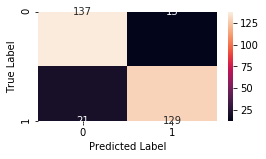

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(4,2))
sns.heatmap(confusion_matrix(y_test, y_prediksi), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hasil akurasi dari confusion matrix sebesar 88% didapat dari :
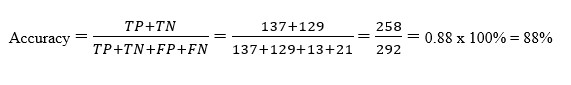

#### Penjelasan :
Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.
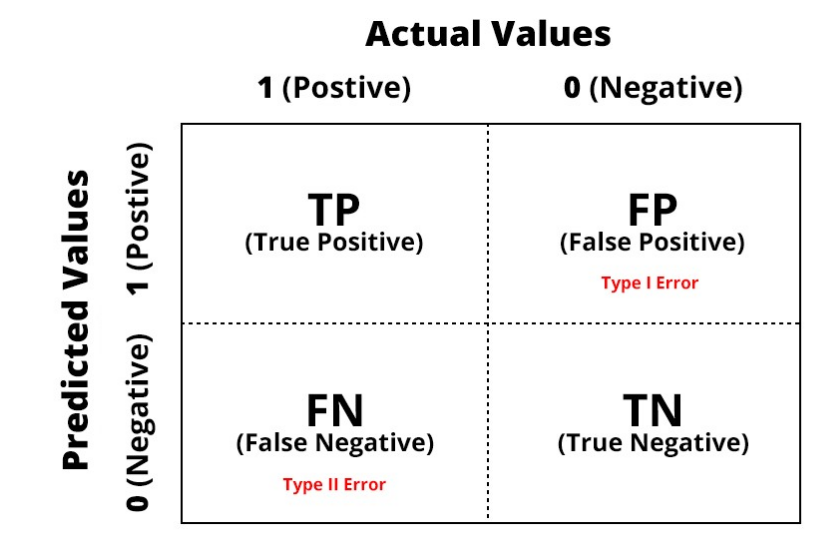
Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). 
1. True Positive (TP)
Merupakan data positif yang diprediksi benar. 
2. True Negative (TN)
Merupakan data negatif yang diprediksi benar. 
3. False Postive (FP) — Type I Error
Merupakan data negatif namun diprediksi sebagai data positif. 
4. False Negative (FN) — Type II Error
Merupakan data positif namun diprediksi sebagai data negatif.

#### Persamaan Nilai Accuracy
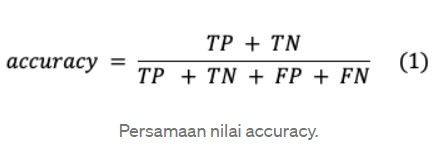

### Persamaan Nilai Precious
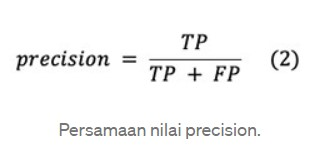

### Persamaan Nilai Recall
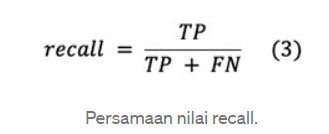

#### Prediksi Data Baru

In [19]:
X_newdata = np.array([[77,86,55]])
X_newdata

array([[77, 86, 55]])

In [20]:
prediksi_gender = knn.predict(X_newdata)
prediksi_gender

array(['male'], dtype=object)

Pada percobaan data diatas menggunakan nilai random yang dipilih, yaitu nilai math score, reading score dan writing score yaitu [77,86,55] didapatkan hasil dari prediksi data tersebut merupakan gender "male" atau laki-laki 

#### Kesimpulan :
Model prediksi ini memiliki performa sebesar 88% merupakan nilai yang cukup besar dan menandakan keakuratan prediksi bisa dikatakan cukup baik, dengan menggunakan nilai k=5, dan jumlah data training sebanyak 700 dan data testing sebanyak 300 pada data pelajar dalam ujian. 
